In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
print("installed succesfully")

installed succesfully


In [4]:
data_train_path="Fruits_Vegetables/train"
data_test_path="Fruits_Vegetables/test"
data_validation_path="Fruits_Vegetables/validation"

In [5]:
img_width=180
img_height=180

In [6]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3130 files belonging to 37 classes.


In [7]:
data_cat=data_train.class_names

In [8]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [9]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 363 files belonging to 37 classes.


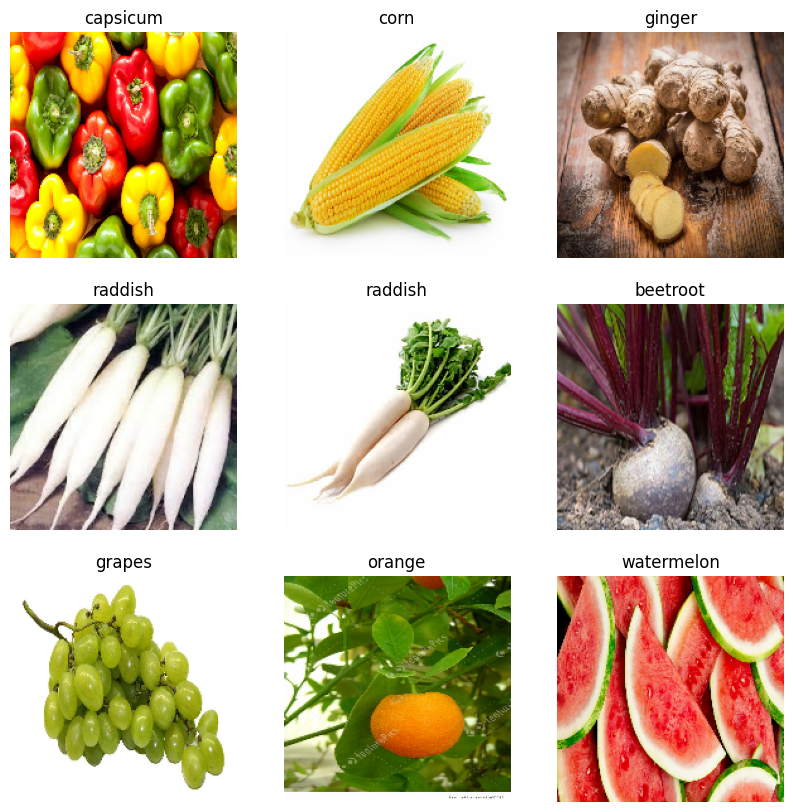

In [10]:
plt.figure(figsize=(10,10))
for image,lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[lables[i]])
        plt.axis("off")

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat)),    
])

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.0767 - loss: 3.6427 - val_accuracy: 0.3162 - val_loss: 3.0036
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.2910 - loss: 2.4471 - val_accuracy: 0.4900 - val_loss: 2.7048
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.4245 - loss: 1.9606 - val_accuracy: 0.6268 - val_loss: 2.5713
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 93s 939ms/step - accuracy: 0.5718 - loss: 1.4369 - val_accuracy: 0.6581 - val_loss: 2.7373
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 93s 946ms/step - accuracy: 0.7310 - loss: 0.9507 - val_accuracy: 0.7179 - val_loss: 3.2766
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 87s 878ms/step - accuracy: 0.8295 - loss: 0.5959 - val_accuracy: 0.7208 - val_loss: 3.7043
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 868ms/step - accuracy: 0.8996 - loss: 0.3657 - val_accuracy: 0.7550 - val_loss: 3.9628
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 876ms/step - accuracy: 0.9486 - loss: 0.2308 - val_accuracy: 

Text(0.5, 1.0, 'Loss')

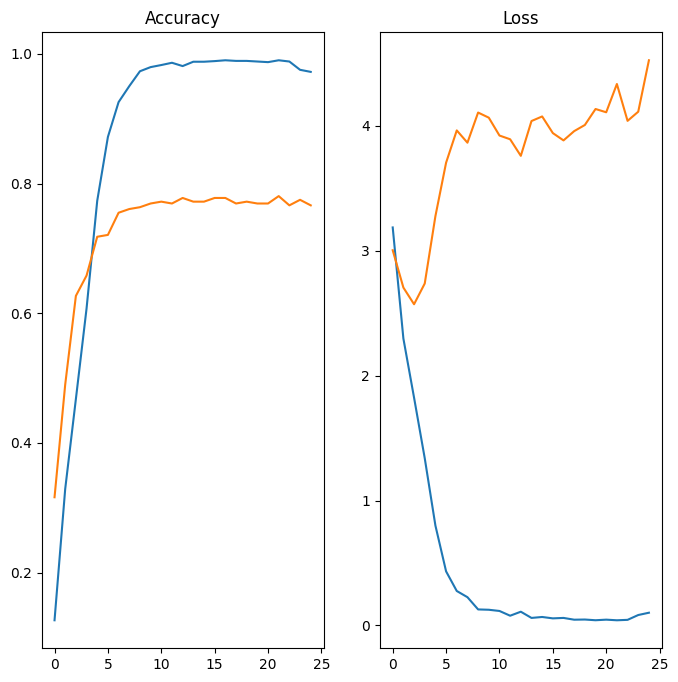

In [16]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='validation loss')
plt.title('Loss')


In [33]:
image="banana.jpg"
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [34]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [35]:
score=tf.nn.softmax(predict)

In [37]:
print("veg/fruite in image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))

veg/fruite in image is banana with accuracy of 99.95


In [38]:
model.save('Image_Classification.keras')